In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# GENERATING RANDOM DATA FOR TRAINING TESTING 

data=pd.read_excel(r"C:\Users\HP\Documents\Imarticus Data Science\ML\Logistic Regression\LoR.xlsx")

simulated_separableish_features = data.drop(['Diabetic','Person'],axis=1)
simulated_labels = data['Diabetic']


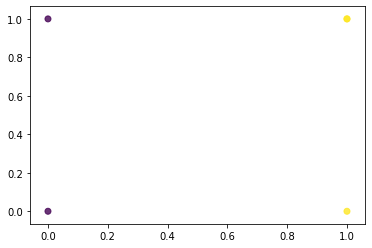

In [42]:
# PLOT RANDOMLY GENERATED DATA 

plt.figure(figsize=(6,4))
plt.scatter(simulated_separableish_features['Obesity'],simulated_separableish_features['Smoking'],c=simulated_labels, alpha = .8)
plt.show()







In [33]:
# BUILDING A LINK FUNCTION


def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))



In [34]:

# DEFINING LOG LIKELIHOOD

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll



In [43]:
# BUILDING MAIN LOGISTIC REGRESSION FUNCTION 

def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        print(features.shape[1])
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with log likelihood gradient
        output_error_signal = target - predictions
        
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient

        # Print log-likelihood every so often
        if step % 10000 == 0:
            print (log_likelihood(features, target, weights))
        
    return weights



In [44]:
# WIEGHTS FOR LOGISTIC REGRESSION BUILT FROM SCRATCH

weights = logistic_regression(simulated_separableish_features, simulated_labels,
                     num_steps = 5, learning_rate = 5e-5, add_intercept=True)
print ("LOGISTIC REGRESSION FROM SRATCH WEIGHTS => ",weights)



final_scores = np.dot(np.hstack((np.ones((simulated_separableish_features.shape[0], 1)),
                                 simulated_separableish_features)), weights)
preds = np.round(sigmoid(final_scores))

print ('Accuracy from scratch: {0}'.format((preds == simulated_labels).sum().astype(float) / len(preds)))



4
-3.465598408346602
LOGISTIC REGRESSION FROM SRATCH WEIGHTS =>  [ 1.24946882e-04  1.24962505e-04  3.74956255e-04 -1.87471875e-08]
Accuracy from scratch: 0.6


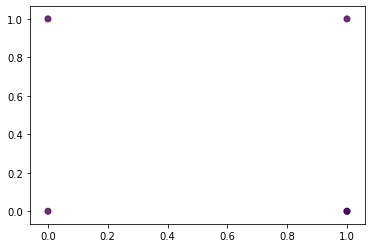

In [40]:
# SOLVED PLOT

plt.figure(figsize = (6,4))
plt.scatter(simulated_separableish_features['Obesity'], simulated_separableish_features['Exercise'],
            c = preds == simulated_labels - 1, alpha = .8)
plt.show()
